In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
!pip install hvplot 
import hvplot.pandas
!pip install -q holoviews 
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')


Output hidden; open in https://colab.research.google.com to view.

In [2]:
#import file
file_path = "https://raw.githubusercontent.com/Aleyvs/Cryptocurrencies/main/Resources/new_iris_data.csv"
iris_df = pd.read_csv(file_path)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Standardize data with Standard Scaler
iris_scaled = StandardScaler().fit_transform(iris_df)
print(iris_scaled[0:5])
# Initialize PCA model to reduce the number of features
pca = PCA(n_components=2)
# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
# Transform PCA data into a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal_component1", "principal_component2"]
)
df_iris_pca.head()

,principal_component1,principal_component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [5]:
import plotly.figure_factory as ff

In [6]:
# Create the dendrogram
fig = ff.create_dendrogram(df_iris_pca, color_threshold=0)
fig.update_layout(width=800, height=500)
fig.show()

In [7]:
#Agglomerative clustering is another name for hierarchical clustering
agg = AgglomerativeClustering(n_clusters=3)
model = agg.fit(df_iris_pca)

In [8]:
# Add the predicted class columns
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal_component1,principal_component2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


:NdOverlay   [class]
   :Scatter   [principal_component1]   (principal_component2,class)
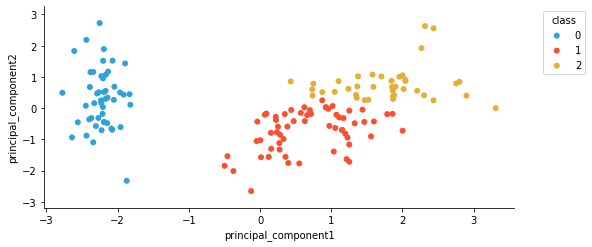

In [9]:
df_iris_pca.hvplot.scatter(
    x="principal_component1",
    y="principal_component2",
    hover_cols=["class"],
    by="class",
)